In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Loading the data and cleaning it

# Load the dataset
df = pd.read_csv("bird_migration_data.csv")

# Drop irrelevant columns
df.drop(columns = ['Bird_ID', 'Tagged_By'], inplace = True, errors = 'ignore')

# Encode the key variable

target_col = 'Migration_Success'
label_enc = LabelEncoder()
df[target_col] = label_enc.fit_transform(df[target_col])

In [3]:
X = df.drop(columns = [target_col])
y = df[target_col]

# Encode the categorical variables

X_encoded = pd.get_dummies(X, drop_first = True)

# Replace missing values
X_filled = X_encoded.fillna(X_encoded.mean(numeric_only = True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)

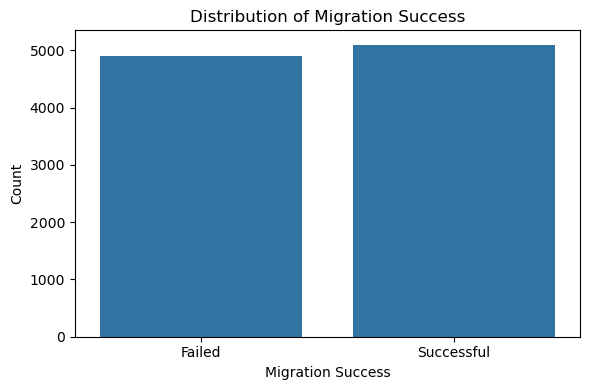

In [4]:
# Create a bar chart comparing successful migrations to unsuccessful
plt.figure(figsize = (6, 4))
sns.countplot(x = y)
plt.title("Distribution of Migration Success")
plt.xticks([0,1], ['Failed', 'Successful'])
plt.xlabel("Migration Success")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("migration_success_distribution.png")
plt.show()

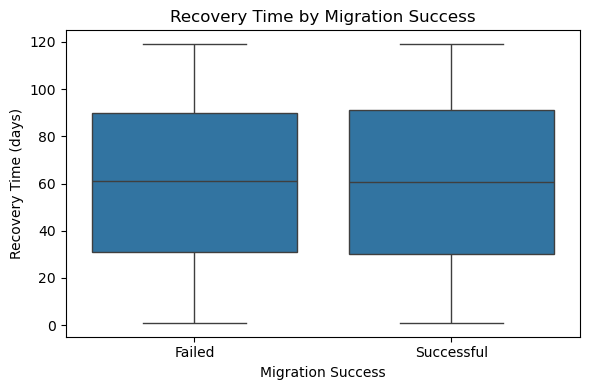

In [5]:
# Create a boxplot to show recovery time vs. migration success
if 'Recovery_Time_days' in df.columns:
    plt.figure(figsize = (6, 4))
    sns.boxplot(x = df['Migration_Success'], y = df['Recovery_Time_days'])
    plt.title("Recovery Time by Migration Success")
    plt.xticks([0, 1], ['Failed', 'Successful'])
    plt.xlabel("Migration Success")
    plt.ylabel("Recovery Time (days)")
    plt.tight_layout()
    plt.savefig("recovery_time_boxplot.png")
    plt.show()

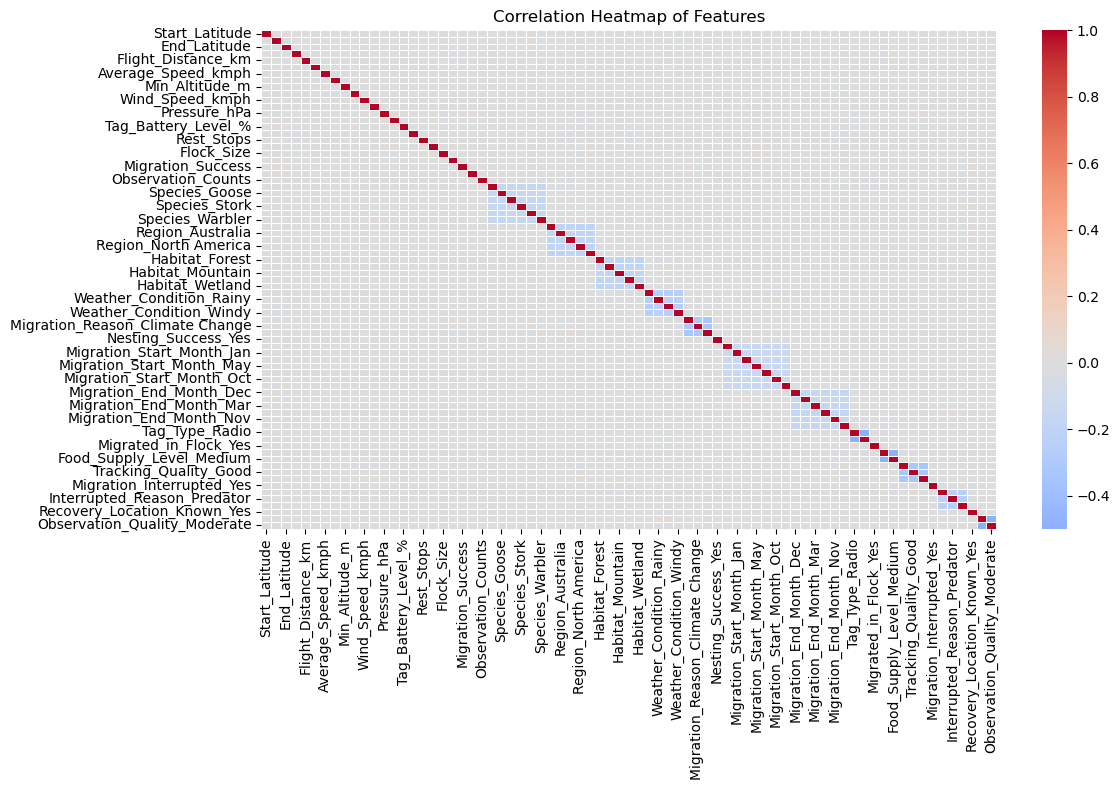

In [6]:
# Create a correlation heatmap
vis_df = pd.get_dummies(df.drop(columns = ['Bird_ID', 'Tagged_By'], errors = 'ignore'), drop_first = True)
vis_df['Migration_Success'] = y
plt.figure(figsize = (12, 8))
corr = vis_df.corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0, linewidths = 0.5)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.savefig("feature_correlation_heatmap.png")
plt.show()

In [7]:
# Create the trainig and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [8]:
# Create the Logistic Regression Model
logreg = LogisticRegression(max_iter = 1000, random_state = 42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Create a Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)


Model: Logistic Regression
Accuracy: 0.5045
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.46      0.46       937
           1       0.53      0.55      0.54      1063

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



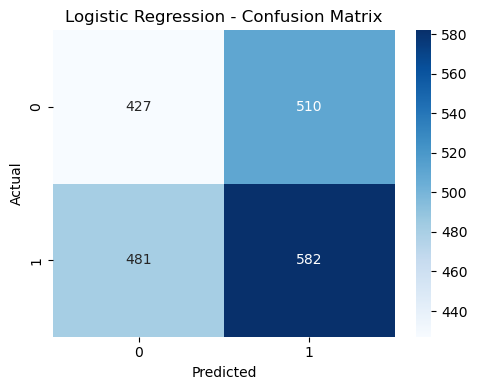


Model: Naive Bayes
Accuracy: 0.512
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       937
           1       0.54      0.53      0.54      1063

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



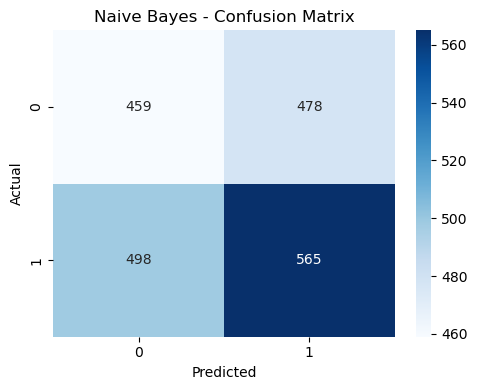

In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))

    # Create Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize = (5, 4))
    sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Evaluate Models
evaluate_model("Logistic Regression", y_test, y_pred_logreg)
evaluate_model("Naive Bayes", y_test, y_pred_gnb)

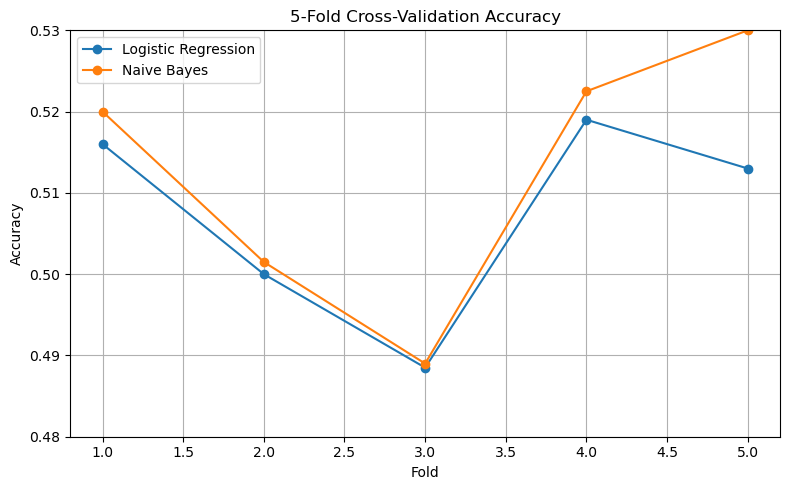

In [24]:
# Run 5-fold cross validation on models and plot
logreg_scores = cross_val_score(logreg, X_scaled, y, cv = 5, scoring = 'accuracy')
gnb_scores = cross_val_score(gnb, X_scaled, y, cv = 5, scoring = 'accuracy')

plt.figure(figsize = (8, 5))
plt.plot(range(1, 6), logreg_scores, marker = 'o', label = 'Logistic Regression')
plt.plot(range(1, 6), gnb_scores, marker = 'o', label = 'Naive Bayes')
plt.title("5-Fold Cross-Validation Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.48, 0.53)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("cross_val_accuracy_plot.png")
plt.show()